In [69]:
def dim(a):
    rows = len(a)
    if rows == 0:
        return [0, 0]
    return [rows, len(a[0])]


def col(idx, a):
    _, cols = dim(a)
    assert cols > idx
    return [row[idx] for row in a]

def row(idx, a):
    rows, _ = dim(a)
    assert rows > idx
    return a[idx]

In [70]:
import numpy as np
import matplotlib.pyplot as plt

quadratic_dataset_1 = np.array([[1, 2], 
                                [2, 3], 
                                [3, 6]])

quadratic_dataset_2 = np.array([[9, 3], 
                                [7, 5], 
                                [1, 9]])

quadratic_dataset_3 = np.array([[8, 4], 
                                [10, 5], 
                                [3, 1]])

In [71]:
def separate_inputs_labels(dataset):
    """
    This function takes a dataset as input and returns the inputs and labels.
    
    Parameters:
    dataset (numpy array): The dataset to be separated.
    
    Returns:
    X_quadratic (3x1 numpy array): The input matrix.
    y_quadratic (1x3 numpy array): The labels vector.
    """


    return np.array([[item] for item in dataset[:,0]]), dataset[:,1]

# Applying the function to each quadratic dataset
X1_quadratic, Y1_quadratic = separate_inputs_labels(quadratic_dataset_1)
X2_quadratic, Y2_quadratic = separate_inputs_labels(quadratic_dataset_2)
X3_quadratic, Y3_quadratic = separate_inputs_labels(quadratic_dataset_3)

print("X1_quadratic: \n", X1_quadratic)
print("y1_quadratic: \n", Y1_quadratic)

X1_quadratic: 
 [[1]
 [2]
 [3]]
y1_quadratic: 
 [2 3 6]


In [72]:
def create_quadratic_design_matrix(X):
    """
    This function takes an input matrix X and returns the design matrix with a 2nd order polynomial term.

    Parameters:
    X (numpy array): The input matrix.

    Returns:
    design_matrix (numpy array): The design matrix with a 2nd order polynomial term.
    """
    # Add a column of ones for the bias term, the original X values, and the X values squared
    design_matrix = np.hstack([X**2, X, np.ones((X.shape[0], 1))])
    return design_matrix

X1_quadratic_design = create_quadratic_design_matrix(X1_quadratic)
X2_quadratic_design = create_quadratic_design_matrix(X2_quadratic)
X3_quadratic_design = create_quadratic_design_matrix(X3_quadratic)

print(X1_quadratic_design)
print(X2_quadratic_design)
print(X2_quadratic_design)

[[1. 1. 1.]
 [4. 2. 1.]
 [9. 3. 1.]]
[[81.  9.  1.]
 [49.  7.  1.]
 [ 1.  1.  1.]]
[[81.  9.  1.]
 [49.  7.  1.]
 [ 1.  1.  1.]]


In [73]:
X1_quadratic_design_inv = np.linalg.inv(X1_quadratic_design)
X2_quadratic_design_inv = np.linalg.inv(X2_quadratic_design)
X3_quadratic_design_inv = np.linalg.inv(X3_quadratic_design)
print(X1_quadratic_design_inv)
print(X2_quadratic_design_inv)
print(X3_quadratic_design_inv)

[[ 0.5 -1.   0.5]
 [-2.5  4.  -1.5]
 [ 3.  -3.   1. ]]
[[ 0.0625     -0.08333333  0.02083333]
 [-0.5         0.83333333 -0.33333333]
 [ 0.4375     -0.75        1.3125    ]]
[[-0.1         0.07142857  0.02857143]
 [ 1.3        -0.78571429 -0.51428571]
 [-3.          1.71428571  2.28571429]]


In [74]:
def calculate_weights(A, Y):
    return np.linalg.inv(A.T@A)@A.T@Y

weights1_quadratic = calculate_weights(X1_quadratic_design, Y1_quadratic)
weights2_quadratic = calculate_weights(X2_quadratic_design, Y2_quadratic)
weights3_quadratic = calculate_weights(X3_quadratic_design, Y3_quadratic)

print("Model parameters for Model 1:", weights1_quadratic)
print("Model parameters for Model 1:", weights2_quadratic)
print("Model parameters for Model 1:", weights3_quadratic)

Model parameters for Model 1: [ 1. -2.  3.]
Model parameters for Model 1: [-0.04166667 -0.33333333  9.375     ]
Model parameters for Model 1: [-0.01428571  0.75714286 -1.14285714]


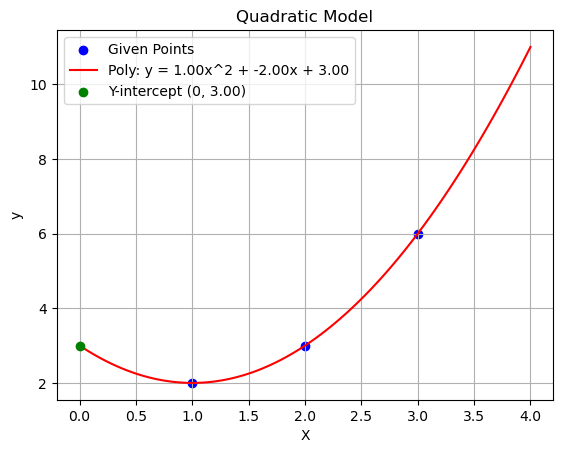

In [75]:
# Function to plot data points and fitted quadratic model
def plot_quadratic_model(X, y, weights):
    # Plot the data points
    plt.scatter(X, y, color='blue', label='Given Points')
    
    # Extend x_vals range to include zero for correct visualization
    x_vals = np.linspace(0, max(X) + 1, 100)
    y_vals = weights[0] * x_vals**2 + weights[1] * x_vals + weights[2]
    
    # Plot the fitted polynomial
    plt.plot(x_vals, 
             y_vals, 
             color='red', 
             label=f'Poly: y = {weights[0]:.2f}x^2 + {weights[1]:.2f}x + {weights[2]:.2f}')
    
    # Plot the y-intercept
    plt.scatter(0, weights[2], color='green', zorder=5, label=f'Y-intercept (0, {weights[2]:.2f})')
    
    # Add title and labels
    plt.title('Quadratic Model')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_quadratic_model(X1_quadratic, Y1_quadratic, weights1_quadratic)

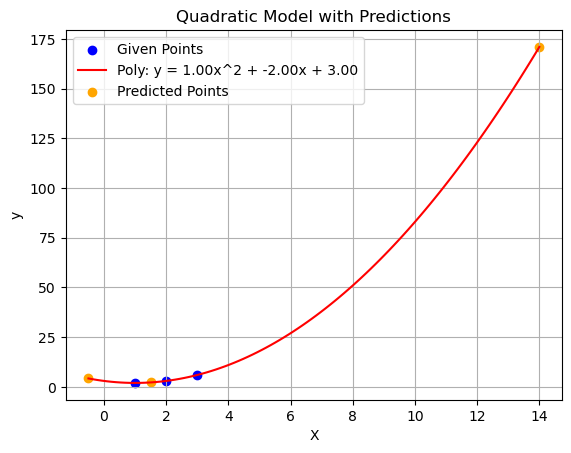

In [76]:
new_input = np.array([-.5, 1.5, 14])

def predict_quadratic(new_x_values, weights):
    if not isinstance(new_x_values, np.ndarray):
        new_x_values = np.array([new_x_values])
    if new_x_values.ndim == 1:
        new_x_values = new_x_values.reshape(-1, 1)

    new_design = create_quadratic_design_matrix(new_x_values)
    return new_design @ weights

def plot_quadratic_model_with_predictions(X, y, weights, new_input):
    # Plot the original data points
    plt.scatter(X, y, color='blue', label='Given Points')

    # Plot the fitted quadratic model
    x_vals = np.linspace(min(X.min(), new_input.min()), max(X.max(), new_input.max()), 100)
    y_vals = weights[0] * x_vals**2 + weights[1] * x_vals + weights[2]
    plt.plot(
    x_vals, 
    y_vals, 
    color='red', 
    label=(
        f'Poly: y = {weights[0]:.2f}x^2 + {weights[1]:.2f}x + '
        f'{weights[2]:.2f}'
    ))

    # Plot the new inputs and their predicted labels
    plt.scatter(new_input, predict_quadratic(new_input, weights), color='orange', label='Predicted Points')

    # Add title, labels, and legend
    plt.title('Quadratic Model with Predictions')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_quadratic_model_with_predictions(X1_quadratic, Y1_quadratic, weights1_quadratic, new_input)

In [ ]:
def create_cubic_design_matrix(X):
    """
    This function takes an input matrix X and returns the design matrix with a 2nd order polynomial term.

    Parameters:
    X (numpy array): The input matrix.

    Returns:
    design_matrix (numpy array): The design matrix with a 2nd order polynomial term.
    """
    # Add a column of ones for the bias term, the original X values, and the X values squared
    design_matrix = np.hstack([X**3, X**2, X, np.ones((X.shape[0], 1))])
    return design_matrix



cubic_dataset = np.array([[7, 6], [5, 24], [8, 60], [1, 120]])

X1_cubic, Y1_cubic = separate_inputs_labels(cubic_dataset)

X1_cubic_design = create_cubic_design_matrix(X1_cubic)

cubic1_weights = calculate_weights(X1_cubic_design, Y1_cubic)
print(cubic1_weights)

[  2.64285714 -31.85714286  85.21428571  64.        ]


In [82]:
def plot_cubic_model(X, y, weights):
    # Plot the data points
    plt.scatter(X, y, color='blue', label='Given Points')
    
    # Extend x_vals range to include zero for correct visualization
    x_vals = np.linspace(0, max(X) + 1, 100)
    y_vals = weights[0] * x_vals**3 + weights[1] * x_vals**2 + weights[2] * x_vals + weights[3]
    
    # Plot the fitted polynomial
    plt.plot(
    x_vals, 
    y_vals, 
    color='red', 
    label=(
        f'Poly: y = {weights[0]:.2f}x^3 + {weights[1]:.2f}x^2 + '
        f'{weights[2]:.2f}x + {weights[3]:.2f}'
    ))
    
    # Plot the y-intercept
    plt.scatter(0, weights[3], color='green', zorder=5, label=f'Y-intercept (0, {weights[3]:.2f})')
    
    # Add title and labels
    plt.title('Cubic Model')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.xlim([-0.25, max(X) + 1])  # Ensure the x-axis starts from 0
    plt.show()


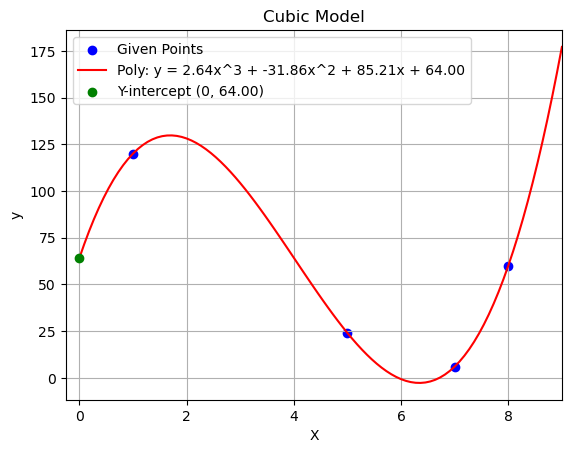

In [83]:
plot_cubic_model(X1_cubic, Y1_cubic, cubic1_weights)

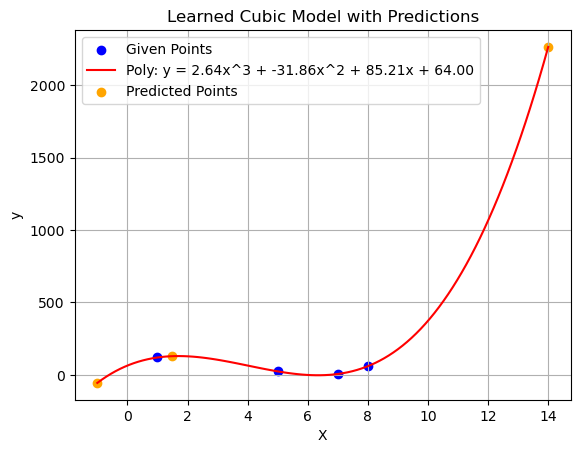

In [85]:
new_inputs = np.array([14, 1.5, -1])
def predict_cubic(new_x_values, weights):
    if not isinstance(new_x_values, np.ndarray):
        new_x_values = np.array([new_x_values])
    if new_x_values.ndim == 1:
        new_x_values = new_x_values.reshape(-1, 1)

    new_design = create_cubic_design_matrix(new_x_values)
    return new_design @ weights
def plot_cubic_model_with_predictions(X, y, weights, new_inputs):
    # Plot the original data points
    plt.scatter(X, y, color='blue', label='Given Points')

    # Plot the fitted cubic model
    x_vals = np.linspace(min(min(X), min(new_inputs)), max(max(X), max(new_inputs)), 100)
    y_vals = weights[0] * x_vals**3 + weights[1] * x_vals**2 + weights[2] * x_vals + weights[3]
    plt.plot(
    x_vals, 
    y_vals, 
    color='red', 
    label=(
        f'Poly: y = {weights[0]:.2f}x^3 + {weights[1]:.2f}x^2 + '
        f'{weights[2]:.2f}x + {weights[3]:.2f}'
    ))

    # Plot the new inputs and their predicted labels
    plt.scatter(new_inputs, predict_cubic(new_inputs, weights), color='orange', label='Predicted Points')

    # Add title, labels, and legend
    plt.title('Learned Cubic Model with Predictions')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_cubic_model_with_predictions(X1_cubic, Y1_cubic, cubic1_weights, new_inputs)